In [35]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics


In [36]:
cwd = os.getcwd()
print(cwd)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full


In [37]:
target_file_get = os.getcwd() + "/"+ "5055818" +"_output_files/"+  "10_4out.csv"
df = pd.read_csv(target_file_get)
df.iloc[0]['mpd.rnd']

#look at one mpd randomization to see data structure. 

231.073

In [38]:
tree_sizes = [10,50,100,200,1000] # define the tree sizes that we have data for (aka: parameter combinations)



In [39]:
# Create your dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [40]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

def mpd_stats(tree_sizes, JobIDint, target_directory):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    for i in tree_sizes:
        size = str(i)
        count = 0
        mpd_sum = 0
        array_temp = []
        name = "mpd" + str(i)
        for file in os.listdir(target_directory):
            if file.startswith(size + "_"):
                direct = target_directory + file 
                temp_df = pd.read_csv(direct)
                mpd_temp = temp_df.iloc[0]['mpd.rnd']
                mpd_sum = mpd_sum + temp_df.iloc[0]['mpd.rnd']
                count  = count + 1
                array_temp.append(mpd_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [41]:
num_files = 1; #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
JobIDint = 5055818
JOBID = str(JobIDint)
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

new_mpd = mpd_stats(tree_sizes, JobIDint, target_directory)

225.06232 295.79903999999993


/var/folders/fv/gkdyhnhs4wvc6bps73kr1d9c0000gp/T/ipykernel_14124/149918867.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


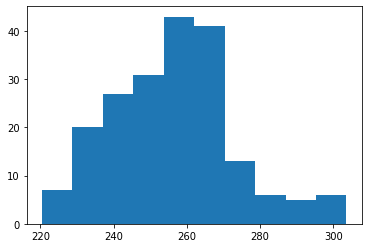

In [61]:
data = new_mpd['mpd10']
plt.hist(data)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



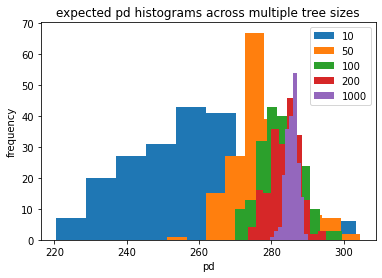

In [43]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_mpd['mpd10'])
plt.hist(new_mpd['mpd50'])
plt.hist(new_mpd['mpd100'])
plt.hist(new_mpd['mpd200'])
plt.hist(new_mpd['mpd1000'])
plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("10","50","100","200","1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [44]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([253.843843421419, 277.13429383414024, 281.5363917784159, 283.0994480789183, 285.475108928312], [258.48131537255085, 279.38143016585974, 283.1468772215841, 284.2360799210817, 285.95119107168796], [256.16257939698494, 278.257862, 282.3416345, 283.667764, 285.71315])


In [55]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)

new_CI_2 = CI_bootstrap(new_mpd)
print(new_CI_2)

([225.06232, 263.9226, 270.7961, 275.74994250000003, 282.39448250000004], [295.79903999999993, 297.149475, 293.874435, 290.7335875, 289.03988], [256.16257939698494, 278.257862, 282.3416345, 283.667764, 285.71315])


In [32]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

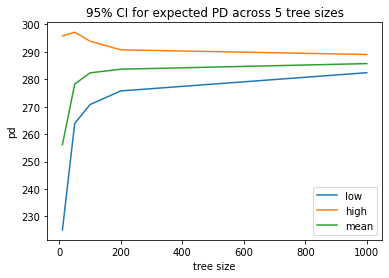

In [58]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, new_CI_2[0])
plt.plot(tree_sizes, new_CI_2[1])
plt.plot(tree_sizes,new_CI_2[2])
labels2 = ("low", "high", "mean")
plt.ylabel("PD")
plt.xlabel("sample size")
plt.title('95% CI for expected PD across 5 tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI.jpg', dpi=300)


In [34]:
CI_export = pd.DataFrame(new_CI)
CI_colnames = dict.keys(new_mpd)
CI_export.columns = CI_colnames
CI_export.index = ["Low", "High", "Mean"]

CI_export.to_csv("Sample_output.csv")

In [59]:
CI_export_bootstrap = pd.DataFrame(new_CI_2)
CI_colnames = dict.keys(new_mpd)
CI_export_bootstrap.columns = CI_colnames
CI_export_bootstrap.index = ["Low", "High", "Mean"]
CI_export_bootstrap.to_csv("Sample_output_bootstrap.csv")
